# Project: Decision Tree Specialty Coffee

## Content


**1. Introduction** 

**2. Objective** 

**3. Sourcing and loading** 
- Import packages
- Load data
- Explore the data
 
**4. Cleaning, transforming and visualizing**
- Cleaning the data
- Train/test split  
  
**5. Modelling** 
- Model 1: Entropy model - no max_depth
- Model 2: Gini impurity model - no max_depth
- Model 3: Entropy model - max depth 3
- Model 4: Gini impurity model - max depth 3

**6. Evaluating and concluding** 
- How many customers will buy Hidden Farm coffee?
- Decision

**7. Model 5: Random Forest** 
- Import necessary modules
- Model

**8. Final Conclusion** 

**9. Why Random Forests outerperform Gini Model2, even with much lower Accuracy?**


## 1. Introduction

Imagine you've just been hired by a rising popular specialty coffee company - RR Diner Coffee - as a data scientist. Congratulations!

RR Diner Coffee sells two types of thing:
- specialty coffee beans, in bulk (by the kilogram only) 
- coffee equipment and merchandise (grinders, brewing equipment, mugs, books, t-shirts).

RR Diner Coffee has three stores, two in Europe and one in the USA. The flagshap store is in the USA, and everything is quality assessed there, before being shipped out. Customers further away from the USA flagship store have higher shipping charges. 

You've been taken on at RR Diner Coffee because the company are turning towards using data science and machine learning to systematically make decisions about which coffee farmers they should strike deals with. 

RR Diner Coffee typically buys coffee from farmers, processes it on site, brings it back to the USA, roasts it, packages it, markets it, and ships it (only in bulk, and after quality assurance) to customers internationally. These customers all own coffee shops in major cities like New York, Paris, London, Hong Kong, Tokyo, and Berlin. 

Now, RR Diner Coffee has a decision about whether to strike a deal with a legendary coffee farm (known as the **Hidden Farm**) in rural China: there are rumours their coffee tastes of lychee and dark chocolate, while also being as sweet as apple juice. 

![Fruity_Coffee](https://user-images.githubusercontent.com/67468718/105829430-37fde600-5f79-11eb-8604-257cb2988a07.JPG)


It's a risky decision, as the deal will be expensive, and the coffee might not be bought by customers. The stakes are high: times are tough, stocks are low, farmers are reverting to old deals with the larger enterprises and the publicity of selling *Hidden Farm* coffee could save the RR Diner Coffee business. 

Your first job, then, is ***To build a decision tree to predict how many units of the Hidden Farm Chinese coffee will be purchased by RR Diner Coffee's most loyal customers.*** 

To this end, you and your team have conducted a survey of 710 of the most loyal RR Diner Coffee customers, collecting data on the customers':
- age
- gender 
- salary 
- whether they have bought at least one RR Diner Coffee product online
- their distance from the flagship store in the USA (standardized to a number between 0 and 11) 
- how much they spent on RR Diner Coffee products on the week of the survey 
- how much they spent on RR Diner Coffee products in the month preeding the survey
- the number of RR Diner coffee bean shipments each customer has ordered over the preceding year. 

You also asked each customer participating in the survey whether they would buy the Hidden Farm coffee, and some (but not all) of the customers gave responses to that question. 

You sit back and think: if more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, you will strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, you won't strike the deal and the Hidden Farm coffee will remain in legends only. There's some doubt in your mind about whether 70% is a reasonable threshold, but it'll do for the moment. 

To solve the problem, then, you will build a decision tree to implement **a classification solution.**


-------------------------------
As ever, this notebook is **tiered**, meaning you can elect that tier that is right for your confidence and skill level. There are 3 tiers, with tier 1 being the easiest and tier 3 being the hardest. This is ***tier 1***, so a gentle introduction to classification models using decision trees. 


    

## 2. Objective

This notebook uses decision trees to determine whether the factors of salary, gender, age, how much money the customer spent last week and during the preceding month on RR Diner Coffee products, how many kilogram coffee bags the customer bought over the last year, whether they have bought at least one RR Diner Coffee product online, and their distance from the flagship store in the USA, could predict whether customers would purchase the Hidden Farm coffee if a deal with its farmers were struck. 

## 3. Sourcing and loading
### 3a. Import Packages

In [4]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from dtreeviz import trees
from sklearn.metrics import roc_curve


### 3b. Load data 

In [5]:
# Read in the data to a variable called coffeeData
coffeeData = pd.read_csv("data/RRDinerCoffeeData.csv")

### 3c. Explore the data

As we've seen, exploration entails doing things like checking out the **initial appearance** of the data with head(), the **dimensions** of our data with .shape, the **data types** of the variables with .info(), the **number of non-null values**, how much **memory** is being used to store the data, and finally the major summary statistcs capturing **central tendancy, dispersion and the null-excluding shape of the dataset's distribution**. 

How much of this can you do yourself by this point in the course? Have a real go. 

In [6]:
# Call head() on your data 
coffeeData.head(8)

,Age,Gender,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
0,36,Female,0,24,73,42789,0.003168,0,1.0
1,24,Male,0,44,164,74035,0.520906,0,NaN
2,24,Male,0,39,119,30563,0.916005,1,1.0
3,20,Male,0,30,107,13166,0.932098,1,NaN
4,24,Female,0,20,36,14244,0.965881,0,1.0
5,20,female,0,23,28,14293,1.036346,1,1.0
6,34,Female,0,55,202,91035,1.134851,0,1.0
7,24,Female,0,20,34,17425,1.193188,0,NaN


In [7]:
# Call .shape on your data
coffeeData.shape

(702, 9)

In [8]:
coffeeData.head()

,Age,Gender,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
0,36,Female,0,24,73,42789,0.003168,0,1.0
1,24,Male,0,44,164,74035,0.520906,0,NaN
2,24,Male,0,39,119,30563,0.916005,1,1.0
3,20,Male,0,30,107,13166,0.932098,1,NaN
4,24,Female,0,20,36,14244,0.965881,0,1.0


In [9]:
# Call info() on your data
coffeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      702 non-null    int64  
 1   Gender                   702 non-null    object 
 2   num_coffeeBags_per_year  702 non-null    int64  
 3   spent_week               702 non-null    int64  
 4   spent_month              702 non-null    int64  
 5   SlrAY                    702 non-null    int64  
 6   Distance                 702 non-null    float64
 7   Online                   702 non-null    int64  
 8   Decision                 474 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 49.5+ KB


In [10]:
# Call describe() on your data with the parameter include = 'all' to get the relevant summary statistics for your data 
coffeeData.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,702.0,34.243590,13.927945,16.000000,23.000000,28.000000,46.000000,90.000000
num_coffeeBags_per_year,702.0,2.710826,1.593629,0.000000,1.000000,3.000000,4.000000,5.000000
spent_week,702.0,32.853276,15.731878,0.000000,24.250000,36.000000,43.000000,62.000000
spent_month,702.0,107.923077,55.348485,0.000000,62.000000,113.500000,150.750000,210.000000
SlrAY,702.0,43819.843305,26192.626943,1617.000000,22812.250000,41975.000000,60223.000000,182058.000000
Distance,702.0,4.559186,3.116275,0.003168,1.877812,4.196167,6.712022,10.986203
Online,702.0,0.531339,0.499373,0.000000,0.000000,1.000000,1.000000,1.000000
Decision,474.0,0.639241,0.480728,0.000000,0.000000,1.000000,1.000000,1.000000


In [11]:
coffeeData.describe().all

<bound method DataFrame.all of               Age  num_coffeeBags_per_year  spent_week  spent_month  \
count  702.000000               702.000000  702.000000   702.000000   
mean    34.243590                 2.710826   32.853276   107.923077   
std     13.927945                 1.593629   15.731878    55.348485   
min     16.000000                 0.000000    0.000000     0.000000   
25%     23.000000                 1.000000   24.250000    62.000000   
50%     28.000000                 3.000000   36.000000   113.500000   
75%     46.000000                 4.000000   43.000000   150.750000   
max     90.000000                 5.000000   62.000000   210.000000   

               SlrAY    Distance      Online    Decision  
count     702.000000  702.000000  702.000000  474.000000  
mean    43819.843305    4.559186    0.531339    0.639241  
std     26192.626943    3.116275    0.499373    0.480728  
min      1617.000000    0.003168    0.000000    0.000000  
25%     22812.250000    1.877812  

## 4. Cleaning, transforming and visualizing
### 4a. Cleaning the data

Some datasets don't require any cleaning, but almost all do. This one does. We need to replace '1.0' and '0.0' in the 'Decision' column by 'YES' and 'NO' respectively, clean up the values of the 'gender' column, and change the column names to words which maximize meaning and clarity. 

First, let's change the name of `spent_week`, `spent_month`, and `SlrAY` to `spent_last_week` and `spent_last_month` and `salary` respectively.

In [12]:
# Check out the names of our data's columns 
coffeeData.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_week', 'spent_month',
       'SlrAY', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [13]:
# Make the relevant name changes to spent_week and spent_per_week.
coffeeData.rename(columns = {"spent_month":"spent_last_month", "spent_week":"spent_last_week", "SlrAY":"Salary"},
            inplace = True)

In [14]:
# Check out the column names
coffeeData.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'Salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [15]:
# Let's have a closer look at the gender column. Its values need cleaning.
coffeeData["Gender"].describe()

count      702
unique       9
top       Male
freq       355
Name: Gender, dtype: object

In [16]:
# See the gender column's unique values 
coffeeData["Gender"].unique()

array(['Female', 'Male', 'female', 'F', 'f ', 'FEMALE', 'MALE', 'male',
       'M'], dtype=object)

We can see a bunch of inconsistency here.

Use replace() to make the values of the `gender` column just `Female` and `Male`.

In [17]:
# Replace all alternate values for the Female entry with 'Female'
coffeeData["Gender"] = coffeeData["Gender"].replace(["female", "f ", "FEMALE", "F"], "Female")

In [18]:
# Check out the unique values for the 'gender' column
coffeeData["Gender"].unique()

array(['Female', 'Male', 'MALE', 'male', 'M'], dtype=object)

In [19]:
# Replace all alternate values with "Male"
coffeeData["Gender"] = coffeeData["Gender"].replace(["MALE", "male", "M"], "Male")

In [20]:
# Let's check the unique values of the column "gender"
coffeeData["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [21]:
# Check out the unique values of the column 'Decision':
coffeeData["Decision"].unique()

array([ 1., nan,  0.])

We now want to replace `1.0` and `0.0` in the `Decision` column by `YES` and `NO` respectively.

In [22]:
# Replace 'Yes' and 'No' by 1 and 0
coffeeData["Decision"] = coffeeData["Decision"].replace(1.0, "YES")
coffeeData["Decision"] = coffeeData["Decision"].replace(0., "NO")
coffeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      702 non-null    int64  
 1   Gender                   702 non-null    object 
 2   num_coffeeBags_per_year  702 non-null    int64  
 3   spent_last_week          702 non-null    int64  
 4   spent_last_month         702 non-null    int64  
 5   Salary                   702 non-null    int64  
 6   Distance                 702 non-null    float64
 7   Online                   702 non-null    int64  
 8   Decision                 474 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 49.5+ KB


In [23]:
# Check that our replacing those values with 'YES' and 'NO' worked, with unique()
coffeeData["Decision"].unique()

array(['YES', nan, 'NO'], dtype=object)

### 4b. Train/test split
To execute the train/test split properly, we need to do six things: 
1. Drop all rows with a null value in the `Decision` column, and save the result as NOPrediction: a dataset that will contain all known values for the decision 
2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis
3. Get the subset of coffeeData with null values in the `Decision` column, and save that subset as Prediction
4. Divide the NOPrediction subset into X and y.
5. then further divide those subsets into train and test subsets for X and y respectively
6. Create dummy variables to deal with categorical inputs

### 1. Drop all null values within the `Decision` column, and save the result as NoPrediction

In [24]:
# NoPrediction will contain all known values for the decision
# Call dropna() on coffeeData, and store the result in a variable NOPrediction 
# Call describe() on the Decision column of NoPrediction after calling dropna() on coffeeData
NOPrediction = coffeeData.dropna()
NOPrediction["Decision"].describe()

count     474
unique      2
top       YES
freq      303
Name: Decision, dtype: object

### 2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis

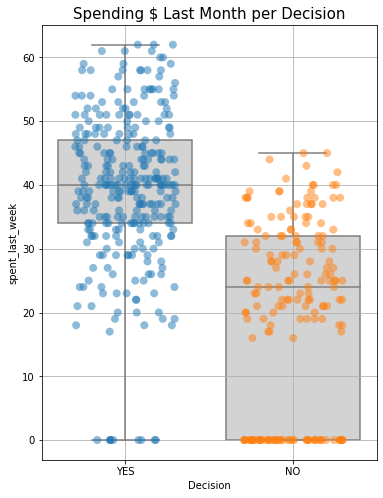

In [25]:
# Exploring our new NOPrediction dataset
# Call boxplot() & striplot() on our Seaborn object sns, and plug y="spent_today", x= "Decision", data=NOPrediction
plt.figure(figsize=(6,8))
ax = sns.boxplot(x='Decision', y='spent_last_week', data=NOPrediction, whis=np.inf, color="lightgrey")
sns.stripplot(x='Decision', y='spent_last_week', data=NOPrediction, jitter=0.3, size=8, alpha=0.5)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Spending $ Last Month per Decision', fontsize=15);

plt.grid(True)

In [26]:
#let's see confirm how much balanced the datset is:
NOPrediction['Decision'].value_counts()

YES    303
NO     171
Name: Decision, dtype: int64

**From above boxplot & striplot we can say that:**

1. RR Coffee customers are loyal which is a very good thing because most of them said "YES" they would try new products.
2. In the other hand, the customers who indicated "NO" "Not willing to try" from the above chart; looks like most of them they would spend less money in the RR products overall mainly because they're NOT frequent coffee drinkers, Because they spend less money (e.g., More people are  not spenting anything last week and overll median are less than the people who indicated YES).

#### Over all I think it's a positive sign to introduce a new products to RR Customers because the Majority of RR customers have the confident in their products!!



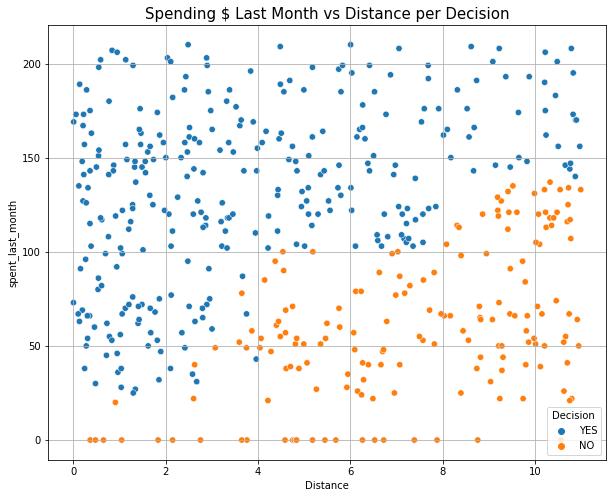

In [27]:
# Call scatterplot() on our Seaborn object sns, and plug in y="spent_last_month", x= "distance", hue = "Decision", data =NOPrediction.
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x='Distance',y='spent_last_month', hue = "Decision", s=40, data =NOPrediction, marker="o")
ax.set_title('Spending $ Last Month vs Distance per Decision', fontsize=15)
plt.grid(True)

**From above scatterplot we can say that:**
  * RR Coffee's Customers who said "Yes", The closer they're from RR Coffeee store the more they spent last month.
  * RR Coffee's Customers who said "No", The closer they're from RR Coffeee store the less they spent last month.
  * The Dataset is imbalanced (303 said 'YES' & 171 said 'NO') and this will affect negatively the Models score accuracy (More details in section 9)

### 3. Get the subset of coffeeData with null values in the Decision column, and save that subset as Prediction

In [28]:
# Get just those rows whose value for the Decision column is null  
Prediction = coffeeData[pd.isnull(coffeeData["Decision"])]
Prediction.head()

,Age,Gender,num_coffeeBags_per_year,spent_last_week,spent_last_month,Salary,Distance,Online,Decision
1,24,Male,0,44,164,74035,0.520906,0,NaN
3,20,Male,0,30,107,13166,0.932098,1,NaN
7,24,Female,0,20,34,17425,1.193188,0,NaN
11,24,Female,0,40,153,84803,1.655096,1,NaN
12,21,Female,0,38,122,42338,1.714179,1,NaN


In [29]:
# Call describe() on Prediction
Prediction.describe()

,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,Salary,Distance,Online
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,31.802632,2.960526,33.394737,110.407895,41923.741228,3.428836,0.570175
std,14.302293,1.585514,15.697930,53.786536,27406.768360,2.153102,0.496140
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.010048,0.000000
25%,22.000000,2.000000,25.750000,65.000000,15911.500000,1.699408,0.000000
50%,25.000000,3.000000,37.000000,113.500000,40987.500000,3.208673,1.000000
75%,39.000000,4.000000,44.000000,151.250000,58537.000000,5.261184,1.000000
max,67.000000,5.000000,62.000000,210.000000,182058.000000,10.871566,1.000000


### 4. Divide the NOPrediction subset into X and y

In [30]:
# Check the names of the columns of NOPrediction
NOPrediction.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'Salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [31]:
# Let's do our feature selection.
# Make a variable called 'features', and a list containing the strings of every column except "Decision":
features = ["Age", "Gender", "num_coffeeBags_per_year", "spent_last_week", "spent_last_month",
       "Salary", "Distance", "Online"]


# Make an explanatory variable called X, and assign it: NOPrediction[features]
X = NOPrediction[features]

# Make a dependent variable called y, and assign it: NOPrediction.Decision
y = NOPrediction.Decision
y

0      YES
2      YES
4      YES
5      YES
6      YES
      ... 
696     NO
697    YES
698     NO
699     NO
701    YES
Name: Decision, Length: 474, dtype: object

### 5. Further divide those subsets into train and test subsets for X and y respectively: X_train, X_test, y_train, y_test

In [32]:
# Call train_test_split on X, y, test_size = 0.25, and random_state = 246
X_train, X_test, y_train, y_test=train_test_split(X, y, 
                                                  test_size = 0.25,
                                                  random_state = 246)

### 6. Create dummy variables to deal with categorical inputs
One-hot encoding replaces each unique value of a given column with a new column, and puts a 1 in the new column for a given row just if its initial value for the original column matches the new column. Check out [this resource](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) if you haven't seen one-hot-encoding before. 

In [33]:
# One-hot encoding all features in training set.
X_train = pd.get_dummies(X_train)

# Do the same, but for X_test
X_test = pd.get_dummies(X_test)

X_test.nunique()

Age                         39
num_coffeeBags_per_year      6
spent_last_week             39
spent_last_month            78
Salary                     119
Distance                   119
Online                       2
Gender_Female                2
Gender_Male                  2
dtype: int64

In [34]:
# So we have 119 records in X_test:
X_test.count()

Age                        119
num_coffeeBags_per_year    119
spent_last_week            119
spent_last_month           119
Salary                     119
Distance                   119
Online                     119
Gender_Female              119
Gender_Male                119
dtype: int64

In [35]:
X_train.columns.unique()

Index(['Age', 'num_coffeeBags_per_year', 'spent_last_week', 'spent_last_month',
       'Salary', 'Distance', 'Online', 'Gender_Female', 'Gender_Male'],
      dtype='object')

## 5. Modelling
It's useful to look at the scikit-learn documentation on decision trees https://scikit-learn.org/stable/modules/tree.html before launching into applying them. If you haven't seen them before, take a look at that link, in particular the section `1.10.5.` 

- Model 1: Entropy model - no max_depth
- Model 2: Gini impurity model - no max_depth
- Model 3: Entropy model - max depth 3
- Model 4: Gini impurity model - max depth 3

![trees](https://user-images.githubusercontent.com/67468718/105844914-d0529580-5f8e-11eb-85c4-99f03e4bb454.JPG)

### Model 1: Entropy model - no max_depth

We'll give you a little more guidance here, as the Python is hard to deduce, and scikitlearn takes some getting used to.

Theoretically, let's remind ourselves of what's going on with a decision tree implementing an entropy model.

Ross Quinlan's **ID3 Algorithm** was one of the first, and one of the most basic, to use entropy as a metric.

**Entropy** is a measure of how uncertain we are about which category the data-points fall into at a given point in the tree. The **Information gain** of a specific feature with a threshold (such as 'spent_last_month <= 138.0') is the difference in entropy that exists before and after splitting on that feature; i.e., the information we gain about the categories of the data-points by splitting on that feature and that threshold. 

Naturally, we want to minimize entropy and maximize information gain. Quinlan's ID3 algorithm is designed to output a tree such that the features at each node, starting from the root, and going all the way down to the leaves, have maximial information gain. We want a tree whose leaves have elements that are *homogeneous*, that is, all of the same category. 

The first model will be the hardest. Persevere and you'll reap the rewards: you can use almost exactly the same code for the other models. 

In [36]:
# Declare a variable called entr_model, and assign it: tree.DecisionTreeClassifier:
entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)

# Call fit() on entr_model:
entr_model.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

# Check out entr_model
entr_model


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [37]:
r = tree.export_text(entr_model, feature_names=list(X_train.columns))
print(r)

|--- spent_last_month <= 138.00
|   |--- Distance <= 3.52
|   |   |--- spent_last_month <= 24.50
|   |   |   |--- class: NO
|   |   |--- spent_last_month >  24.50
|   |   |   |--- Age <= 59.00
|   |   |   |   |--- class: YES
|   |   |   |--- Age >  59.00
|   |   |   |   |--- class: NO
|   |--- Distance >  3.52
|   |   |--- spent_last_month <= 101.00
|   |   |   |--- Distance <= 4.00
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- class: YES
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- class: NO
|   |   |   |--- Distance >  4.00
|   |   |   |   |--- class: NO
|   |   |--- spent_last_month >  101.00
|   |   |   |--- Distance <= 7.89
|   |   |   |   |--- class: YES
|   |   |   |--- Distance >  7.89
|   |   |   |   |--- class: NO
|--- spent_last_month >  138.00
|   |--- class: YES



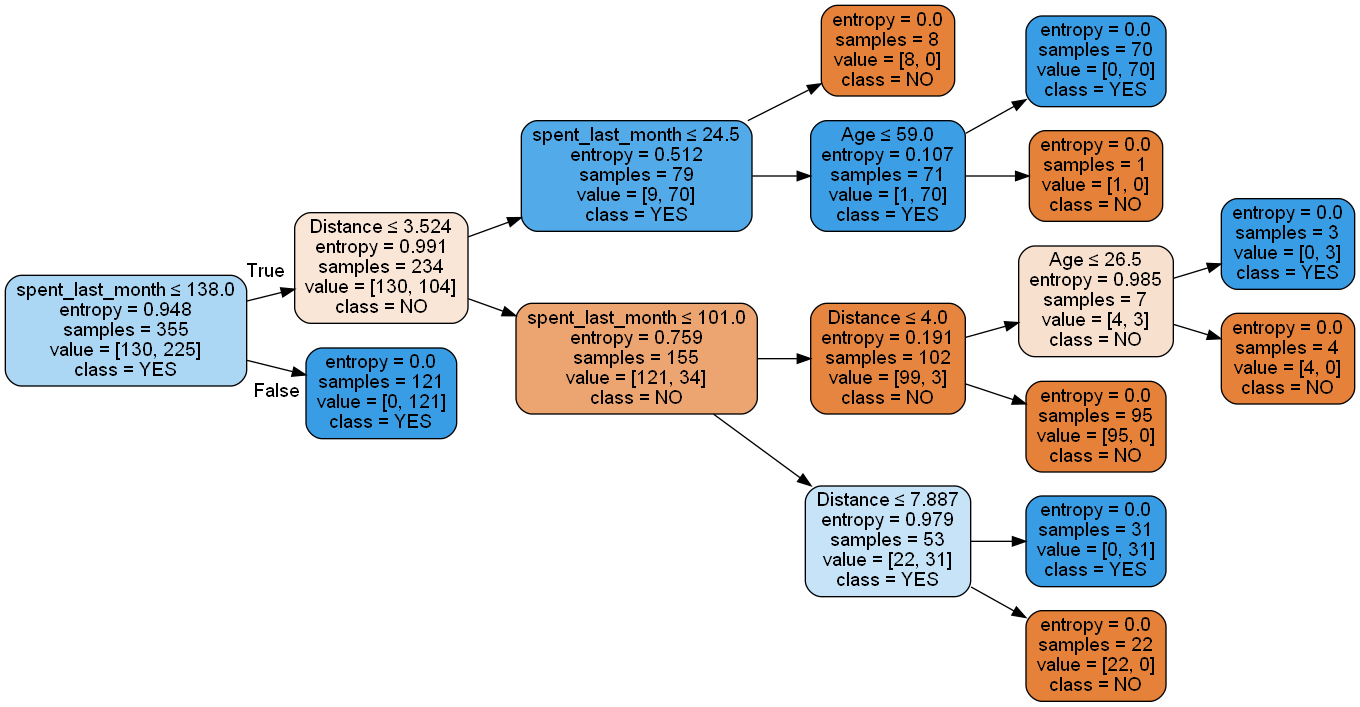

In [38]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entr_model, out_file=dot_data, 
                     filled=True, rounded=True, rotate =True,
                     special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## "Entropy model - no max_depth" Decision Tree Summary:

1. As shown above, we have 9 leaves with purity at 0 (This is the ideal scenario), however 4 of them are having a very low number of samples so we cannot be very confident for their predictions **(clear sign of over-fitting)**.
2. Features used in the splits: **spend_last_month**, **Distance** and **Age**  (features importance illustrated below).
3. As shown above, we have a fully grown Decision Tree (none of the parameters were set e.g., **max_depth**) as a result the tree grows to a fully to a depth of 5. There are 8 nodes and 9 leaves: **Not limiting the growth of a Decision Tree will delay reaching the split choices that will get us to the pure nodes (leaves=predictions) causing over-fitting.**

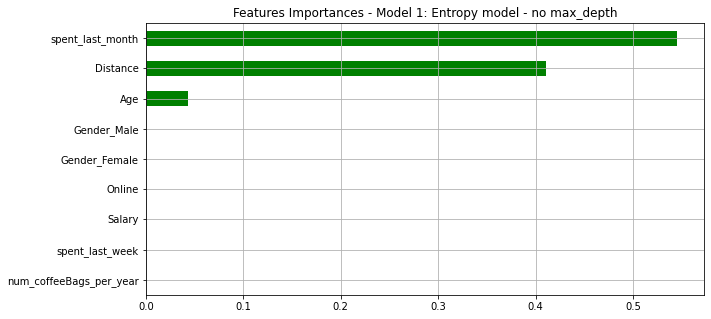

In [39]:
# Create a pd.Series of features importances
importances_dt_ent = pd.Series(data=entr_model.feature_importances_, index=X_train.columns)

# Sort importances
importances_sorted = importances_dt_ent.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(10, 5))
importances_sorted.plot(kind='barh', color='green')
plt.title('Features Importances - Model 1: Entropy model - no max_depth')
plt.grid(True)
plt.show()

### Model 1: Entropy model - no max_depth: Interpretation and evaluation

In [40]:
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "NO"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy - no max depth
Accuracy: 0.9915966386554622
Balanced accuracy: 0.9878048780487805
Precision score for "Yes" 0.9873417721518988
Precision score for "No" 1.0
Recall score for "Yes" 1.0
Recall score for "No" 0.975609756097561


In [41]:
print("Model Entropy - no max depth: confusion_matrix")
print(confusion_matrix(y_test, (entr_model.predict(X_test))))

Model Entropy - no max depth: confusion_matrix
[[40  1]
 [ 0 78]]


**<ins>Model Entropy - no max depth:<ins>** **Confusion Matrix Breakdown**
    

| Metrics | value  |Metrics   | value  | Total  | value  |
|:---:|:---:|:---:|:---:|:---:|:---:|
| TP |  40 | FN  | 1  |Total   | 41  |
| FP |   0|  TN | 78  |Total   | 78  |
    
    
    
    
       

In [42]:
print("Model Entropy - no max depth: classification report")
print(classification_report(y_test, y_pred, digits=6))

Model Entropy - no max depth: classification report
              precision    recall  f1-score   support

          NO   1.000000  0.975610  0.987654        41
         YES   0.987342  1.000000  0.993631        78

    accuracy                       0.991597       119
   macro avg   0.993671  0.987805  0.990642       119
weighted avg   0.991703  0.991597  0.991572       119



In [43]:
y_pred_prob = entr_model.predict_proba(X_test)[:,1]
print("entr_model AUC: {}".format(roc_auc_score(y_test,y_pred_prob )))

entr_model AUC: 0.9878048780487805


What can you infer from these results? Write your conclusions here:

### Model 2: Gini impurity model - no max_depth

Gini impurity, like entropy, is a measure of how well a given feature (and threshold) splits the data into categories.

Their equations are similar, but Gini impurity doesn't require logorathmic functions, which can be computationally expensive. 

In [44]:
# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'
gini_model= tree.DecisionTreeClassifier(criterion="gini",random_state=1234)

# Call fit() on the gini_model as you did with the entr_model
gini_model.fit(X_train, y_train)

# Call predict() on the gini_model as you did with the entr_model 
y_pred = gini_model.predict(X_test)

# Turn y_pred into a series, as before
y_pred = pd.Series(y_pred)

# Check out gini_model
gini_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [45]:
r = tree.export_text(gini_model, feature_names=list(X_train.columns))
print(r)

|--- spent_last_month <= 100.50
|   |--- Distance <= 3.75
|   |   |--- spent_last_month <= 24.50
|   |   |   |--- class: NO
|   |   |--- spent_last_month >  24.50
|   |   |   |--- Age <= 57.50
|   |   |   |   |--- Distance <= 3.30
|   |   |   |   |   |--- class: YES
|   |   |   |   |--- Distance >  3.30
|   |   |   |   |   |--- spent_last_month <= 59.50
|   |   |   |   |   |   |--- class: NO
|   |   |   |   |   |--- spent_last_month >  59.50
|   |   |   |   |   |   |--- class: YES
|   |   |   |--- Age >  57.50
|   |   |   |   |--- class: NO
|   |--- Distance >  3.75
|   |   |--- Distance <= 4.00
|   |   |   |--- num_coffeeBags_per_year <= 2.00
|   |   |   |   |--- class: NO
|   |   |   |--- num_coffeeBags_per_year >  2.00
|   |   |   |   |--- class: YES
|   |   |--- Distance >  4.00
|   |   |   |--- class: NO
|--- spent_last_month >  100.50
|   |--- Distance <= 8.05
|   |   |--- class: YES
|   |--- Distance >  8.05
|   |   |--- spent_last_month <= 140.50
|   |   |   |--- class: NO
|   

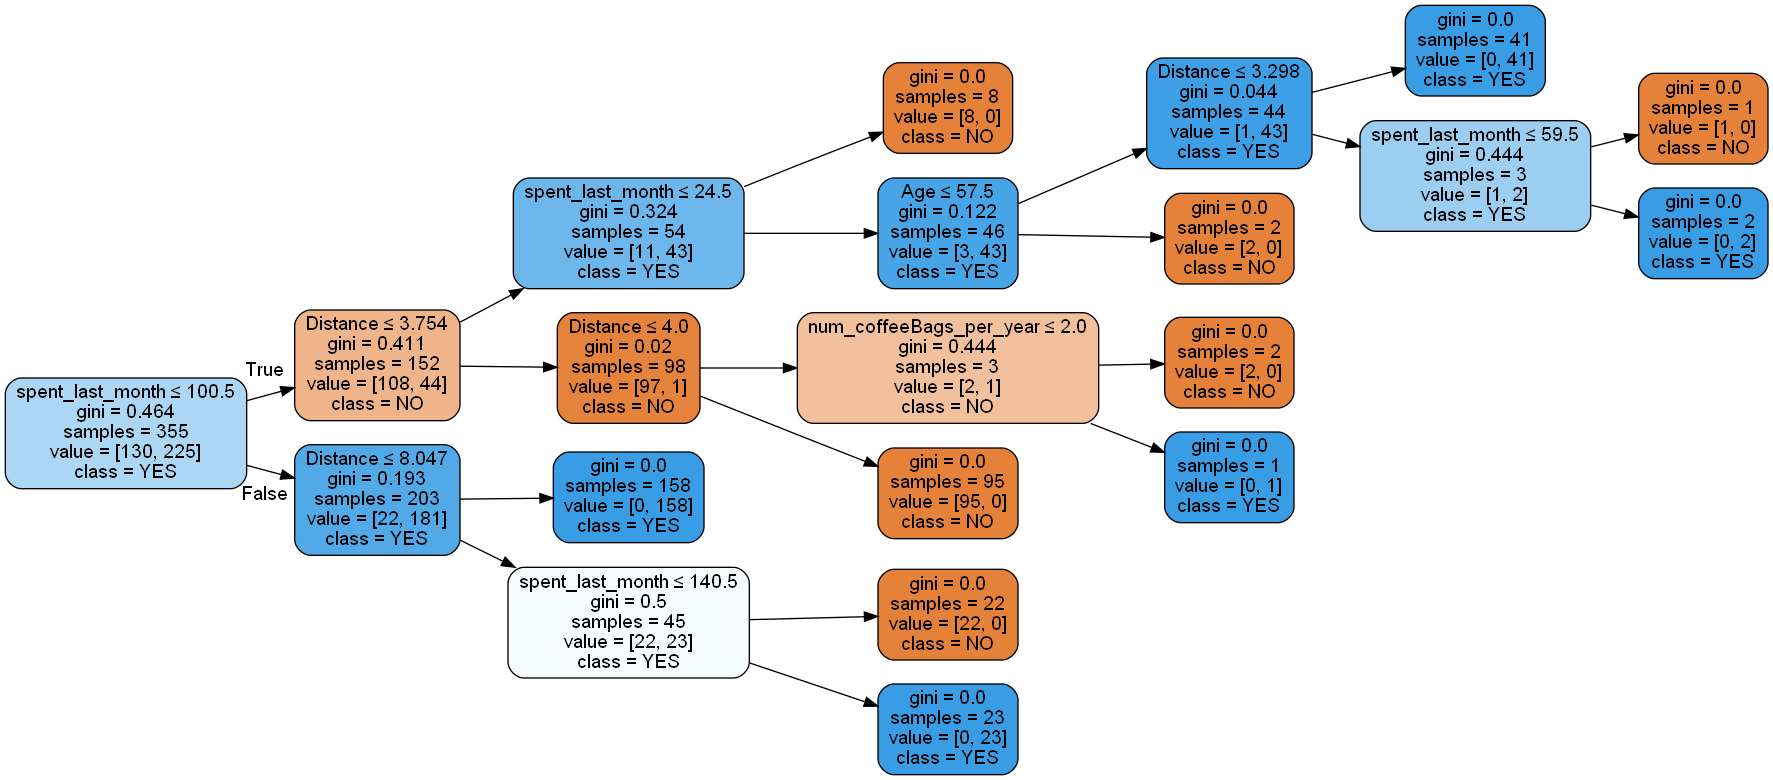

In [46]:
# As before, but make the model name gini_model
dot_data = StringIO()
tree.export_graphviz(gini_model, out_file=dot_data,  
                     filled=True, rounded=True, rotate=True,
                     special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])

# Alternatively for class_names use gini_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## "Gini model - no max_depth" Decision Tree Summary:

1. As shown above, we have 11 leaves with purity at 0 (This is the ideal scenario), however 6 of them are having a very low number of samples so we cannot be very confident for their predictions **(clear sign of over-fitting)**.
2. Features used in the splits: **spend_last_month**, **Distance**, **Age** and **num_coffeeBags_per_year** (features importance illustrated below).
3. As shown above, we have a fully grown Decision Tree (none of the parameters were set e.g., **max_depth**) as a result the tree grows to a fully to a depth of 6. There are 10 nodes and 11 leaves: **Not limiting the growth of a Decision Tree will delay reaching the split choices that will get us to the pure nodes (leaves=predictions) causing over-fitting.**

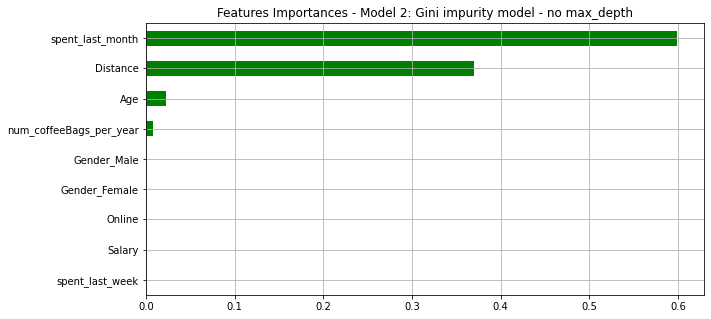

In [47]:
# Create a pd.Series of features importances
importances_dt_gin = pd.Series(data=gini_model.feature_importances_, index=X_train.columns)

# Sort importances
importances_sorted = importances_dt_gin.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(10, 5))
importances_sorted.plot(kind='barh', color='green')
plt.title('Features Importances - Model 2: Gini impurity model - no max_depth')
plt.grid(True)
plt.show()

In [48]:
# Run this block for model evaluation
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Gini impurity model
Accuracy: 0.9831932773109243
Balanced accuracy: 0.9813946216385241
Precision score 0.9871794871794872
Recall score 0.975609756097561


In [49]:
print("Model Gini impurity model: confusion_matrix")
print(confusion_matrix(y_test, y_pred))


Model Gini impurity model: confusion_matrix
[[40  1]
 [ 1 77]]


**<ins>Model Gini impurity model:<ins>** **Confusion Matrix Breakdown**

| Metrics | value  |Metrics   | value  | Total  | value  |
|:---:|:---:|:---:|:---:|:---:|:---:|
| TP |  40 | FN  | 1  |Total   | 41  |
| FP |   1|  TN | 77  |Total   | 78  |

In [50]:
print("Model Gini impurity model: classification_report")
print(classification_report(y_test, y_pred, digits=6))

Model Gini impurity model: classification_report
              precision    recall  f1-score   support

          NO   0.975610  0.975610  0.975610        41
         YES   0.987179  0.987179  0.987179        78

    accuracy                       0.983193       119
   macro avg   0.981395  0.981395  0.981395       119
weighted avg   0.983193  0.983193  0.983193       119



In [51]:
y_pred_prob = gini_model.predict_proba(X_test)[:,1]
print("gini_model AUC: {}".format(roc_auc_score(y_test,y_pred_prob )))

gini_model AUC: 0.9813946216385241


How do the results here compare to the previous model? Write your judgements here: 

### Model 3: Entropy model - max depth 3
We're going to try to limit the depth of our decision tree, using entropy first.  

As you know, we need to strike a balance with tree depth. 

Insufficiently deep, and we're not giving the tree the opportunity to spot the right patterns in the training data.

Excessively deep, and we're probably going to make a tree that overfits to the training data, at the cost of very high error on the (hitherto unseen) test data. 

Sophisticated data scientists use methods like random search with cross-validation to systematically find a good depth for their tree. We'll start with picking 3, and see how that goes. 

In [52]:
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 3. 
# Execute the fitting, predicting, and Series operations as before
entr_model2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 3, random_state = 1234)
entr_model2.fit(X_train, y_train)
y_pred = entr_model2.predict(X_test)
y_pred = pd.Series(y_pred)
entr_model2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [53]:
r = tree.export_text(entr_model2, feature_names=list(X_train.columns))
print(r)

|--- spent_last_month <= 138.00
|   |--- Distance <= 3.52
|   |   |--- spent_last_month <= 24.50
|   |   |   |--- class: NO
|   |   |--- spent_last_month >  24.50
|   |   |   |--- class: YES
|   |--- Distance >  3.52
|   |   |--- spent_last_month <= 101.00
|   |   |   |--- class: NO
|   |   |--- spent_last_month >  101.00
|   |   |   |--- class: YES
|--- spent_last_month >  138.00
|   |--- class: YES



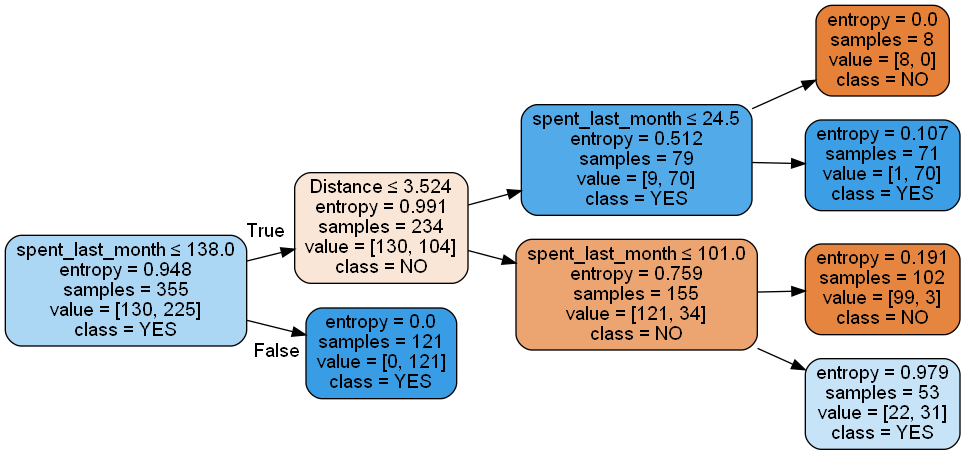

In [54]:
# As before, we need to visualize the tree to grasp its nature
dot_data = StringIO()
tree.export_graphviz(entr_model2, out_file=dot_data,  
                      filled=True, rounded=True, rotate=True,
                     special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])

# Alternatively for class_names use entr_model2.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## "Entropy model - max depth 3" Decision Tree Summary:

1. As shown above, we have 5 leaves with purity at 0 (One Class) with only one leave having a very low number of samples (This is the ideal scenario): **The more leaves with purity=0 and high samples the more information gain (more predicition power).**
2. Features used in the splits: **spend_last_month**, **Distance**, **Age** and **num_coffeeBags_per_year** (features importance illustrated below).
3. As shown above, we have a  Decision Tree (**max_depth=3**) as a result the tree grows to a depth of 3. There are 4 nodes and 5 leaves: **When limiting the growth of the Decision Tree we find the split choices that will get us to the pure nodes much faster resulting in more information gain (more predicition power).**

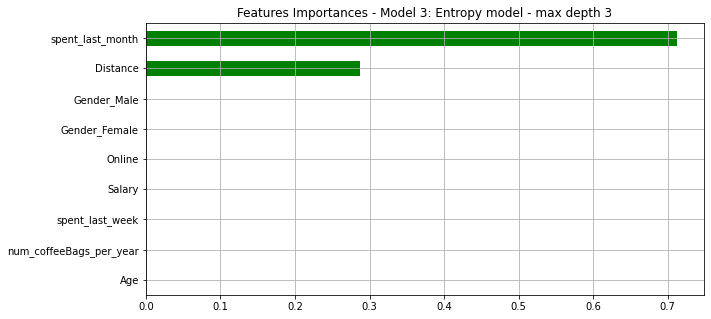

In [55]:
# Create a pd.Series of features importances
importances_dt_ent2 = pd.Series(data=entr_model2.feature_importances_, index=X_train.columns)

# Sort importances
importances_sorted = importances_dt_ent2.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(10, 5))
importances_sorted.plot(kind='barh', color='green')
plt.title('Features Importances - Model 3: Entropy model - max depth 3')
plt.grid(True)
plt.show()

In [56]:
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy model max depth 3
Accuracy: 0.907563025210084
Balanced accuracy: 0.8658536585365854
Precision score for "Yes" 0.8764044943820225
Recall score for "No" 0.7317073170731707


In [57]:
print("Model Entropy model max depth 3: confusion_matrix")
print(confusion_matrix(y_test, y_pred))


Model Entropy model max depth 3: confusion_matrix
[[30 11]
 [ 0 78]]


**<ins>Model Entropy model max depth 3:<ins>** **Confusion Matrix Breakdown**
    
    
| Metrics | value  |Metrics   | value  | Total  | value  |
|:---:|:---:|:---:|:---:|:---:|:---:|
| TP |  30 | FN  | 11  |Total   | 41  |
| FP |   0|  TN | 78  |Total   | 78  |   


In [58]:
print("Model Entropy model max depth 3: classification_report")
print(classification_report(y_test, y_pred, digits=6))

Model Entropy model max depth 3: classification_report
              precision    recall  f1-score   support

          NO   1.000000  0.731707  0.845070        41
         YES   0.876404  1.000000  0.934132        78

    accuracy                       0.907563       119
   macro avg   0.938202  0.865854  0.889601       119
weighted avg   0.918988  0.907563  0.903447       119



In [59]:
y_pred_prob = entr_model2.predict_proba(X_test)[:,1]
print("entr_model2 AUC: {}".format(roc_auc_score(y_test,y_pred_prob )))

entr_model2 AUC: 0.9765478424015009


So our accuracy decreased, but is this certainly an inferior tree to the max depth original tree we did with Model 1? Write your conclusions here: 

### Model 4: Gini impurity  model - max depth 3
We're now going to try the same with the Gini impurity model. 

In [60]:
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
gini_model2 = tree.DecisionTreeClassifier(criterion='gini', random_state = 1234, max_depth = 3)

# Do the fit, predict, and series transformations as before. 
gini_model2.fit(X_train, y_train)
y_pred = gini_model2.predict(X_test)
y_pred = pd.Series(y_pred)
gini_model2


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [61]:
r = tree.export_text(gini_model2, feature_names=list(X_train.columns))
print(r)

|--- spent_last_month <= 100.50
|   |--- Distance <= 3.75
|   |   |--- spent_last_month <= 24.50
|   |   |   |--- class: NO
|   |   |--- spent_last_month >  24.50
|   |   |   |--- class: YES
|   |--- Distance >  3.75
|   |   |--- Distance <= 4.00
|   |   |   |--- class: NO
|   |   |--- Distance >  4.00
|   |   |   |--- class: NO
|--- spent_last_month >  100.50
|   |--- Distance <= 8.05
|   |   |--- class: YES
|   |--- Distance >  8.05
|   |   |--- spent_last_month <= 140.50
|   |   |   |--- class: NO
|   |   |--- spent_last_month >  140.50
|   |   |   |--- class: YES



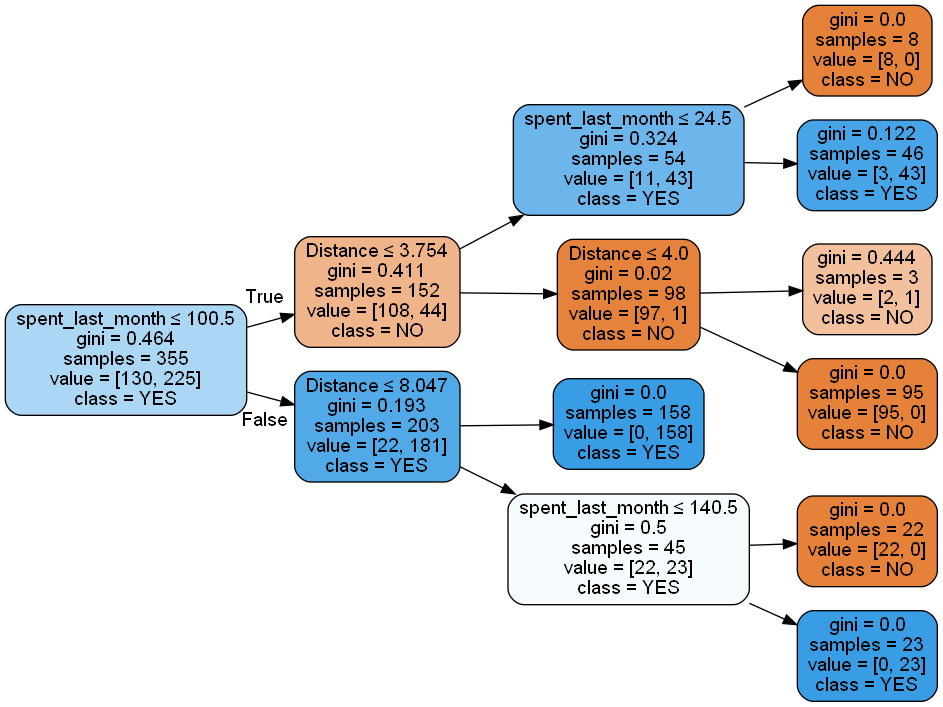

In [62]:
dot_data = StringIO()
tree.export_graphviz(gini_model2, out_file=dot_data,  
                     filled=True, rounded=True, rotate=True,
                     special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])

# Alternatively for class_names use gini_model2.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## "Gini model - max depth 3" Decision Tree Summary:

1. As shown above, we have 7 leaves with purity at 0 (One Class) with only one leave having a very low number of samples (This is the ideal scenario): **The more leaves with purity=0 and high samples the more information gain (more predicition power).**
2. Features used in the splits: **spend_last_month** and **Distance** (features importance illustrated below).
3. As shown above, we have a  Decision Tree (**max_depth=3**) as a result the tree grows to a depth of 3. There are 6 nodes and 7 leaves: **When limiting the growth of the Decision Tree we find the split choices that will get us to the pure nodes much faster resulting in more information gain (more predicition power).**

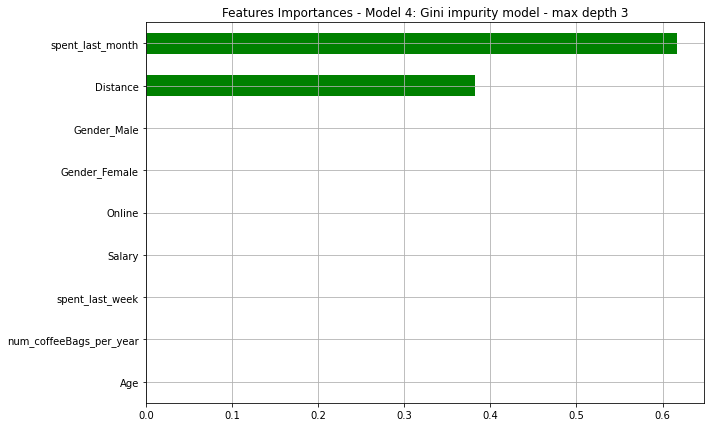

In [63]:
# Create a pd.Series of features importances
importances_dt_gin2 = pd.Series(data=gini_model2.feature_importances_, index=X_train.columns)

# Sort importances
importances_sorted = importances_dt_gin2.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(10, 7))
importances_sorted.plot(kind='barh', color='green')
plt.title('Features Importances - Model 4: Gini impurity model - max depth 3')
plt.grid(True)
plt.show()

In [64]:
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Gini impurity  model - max depth 3
Accuracy: 0.9747899159663865
Balanced accuracy: 0.9691994996873046
Precision score 0.9746835443037974
Recall score 0.9512195121951219


In [65]:
y_test.value_counts()

YES    78
NO     41
Name: Decision, dtype: int64

In [66]:
print("Gini impurity  model - max depth 3: confusion_matrix")
print(confusion_matrix(y_test, y_pred))


Gini impurity  model - max depth 3: confusion_matrix
[[39  2]
 [ 1 77]]


**<ins>Gini impurity  model - max depth 3:<ins>** **Confusion Matrix Breakdown**

| Metrics | value  |Metrics   | value  | Total  | value  |
|:---:|:---:|:---:|:---:|:---:|:---:|
| TP |  39 | FN  | 2  |Total   | 41  |
| FP |   1|  TN | 77  |Total   | 78  |    

In [67]:
print("Gini impurity  model - max depth 3: classification_report")
print(classification_report(y_test, y_pred, digits=6))

Gini impurity  model - max depth 3: classification_report
              precision    recall  f1-score   support

          NO   0.975000  0.951220  0.962963        41
         YES   0.974684  0.987179  0.980892        78

    accuracy                       0.974790       119
   macro avg   0.974842  0.969199  0.971927       119
weighted avg   0.974793  0.974790  0.974715       119



In [68]:
y_pred_prob = gini_model2.predict_proba(X_test)[:,1]
print("gini_model2 AUC: {}".format(roc_auc_score(y_test,y_pred_prob )))

gini_model2 AUC: 0.9870231394621638


Now this is an elegant tree. Its accuracy might not be the highest, but it's still the best model we've produced so far. Why is that? Write your answer here: 

  1. Calculation of Entropy in Gini method behaves in the same way but entropy involves a log computation and Gini impurity involved a square computation. Since computing square is cheaper than logarithmic function we prefer Gini impurity over entropy.
  2. We have 7 leaves with purity at 0 (One Class) in **Gini** compared to only 5 leaves with purity at 0in **Entropy:** **The more leaves with purity=0 and high samples the more information gain (more predicition power).**

## 6. Evaluating and concluding
### 6a. How many customers will buy Hidden Farm coffee? 
Let's first ascertain how many loyal customers claimed, in the survey, that they will purchase the Hidden Farm coffee. 

In [69]:
# Call value_counts() on the 'Decision' column of the original coffeeData
coffeeData["Decision"].value_counts()

YES    303
NO     171
Name: Decision, dtype: int64

Let's now determine the number of people that, according to the model, will be willing to buy the Hidden Farm coffee. 
1. First we subset the Prediction dataset into `new_X` considering all the variables except `Decision` 
2. Use that dataset to predict a new variable called `potential_buyers`

In [70]:
# Feature selection
# Make a variable called feature_cols, and assign it a list containing all the column names except 'Decision'
feature_cols = ["Age", "Gender", "num_coffeeBags_per_year", "spent_last_week", "spent_last_month",
                "Salary", "Distance", "Online"]

# Make a variable called new_X, and assign it the subset of Prediction, containing just the feature_cols 
new_X = Prediction[feature_cols]

In [71]:
# Call get_dummies() on the Pandas object pd, with new_X plugged in, to one-hot encode all features in the training set
new_X = pd.get_dummies(new_X)

# Make a variable called potential_buyers, and assign it the result of calling predict() on a model of your choice; 
# don't forget to pass new_X to predict()
potential_buyers = gini_model2.predict(new_X)

In [72]:
# Let's get the numbers of YES's and NO's in the potential buyers 
# Call unique() on np, and pass potential_buyers and return_counts=True 
np.unique(potential_buyers, return_counts=True)

(array(['NO', 'YES'], dtype=object), array([ 45, 183], dtype=int64))

The total number of potential buyers is 303 + 183 = 486

In [73]:
# Print the total number of surveyed people 
print("The total number of surveyed people was", coffeeData.Salary.count())

The total number of surveyed people was 702


In [74]:
# Let's calculate the proportion of buyers
486/702

0.6923076923076923

In [75]:
# Print the percentage of people who want to buy the Hidden Farm coffee, by our model 
print("Only ", round((486/702)*100, 2), "% of people want to buy the Hidden Farm coffee." )

Only  69.23 % of people want to buy the Hidden Farm coffee.


### 6b. Decision
Remember how you thought at the start: if more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, you will strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, you won't strike the deal and the Hidden Farm coffee will remain in legends only. Well now's crunch time. Are you going to go ahead with that idea? If so, you won't be striking the deal with the Chinese farmers. 

They're called `decision trees`, aren't they? So where's the decision? What should you do? (Cue existential cat emoji). 

Ultimately, though, we can't write an algorithm to actually *make the business decision* for us. This is because such decisions depend on our values, what risks we are willing to take, the stakes of our decisions, and how important it us for us to *know* that we will succeed. What are you going to do with the models you've made? Are you going to risk everything, strike the deal with the *Hidden Farm* farmers, and sell the coffee? 

The philosopher of language Jason Stanley once wrote that the number of doubts our evidence has to rule out in order for us to know a given proposition depends on our stakes: the higher our stakes, the more doubts our evidence has to rule out, and therefore the harder it is for us to know things. We can end up paralyzed in predicaments; sometimes, we can act to better our situation only if we already know certain things, which we can only if our stakes were lower and we'd *already* bettered our situation. 

Data science and machine learning can't solve such problems. But what it can do is help us make great use of our data to help *inform* our decisions.

## 7. Model 5: Random Forest
You might have noticed an important fact about decision trees. Each time we run a given decision tree algorithm to make a prediction (such as whether customers will buy the Hidden Farm coffee) we will actually get a slightly different result. This might seem weird, but it has a simple explanation: machine learning algorithms are by definition ***stochastic***, in that their output is at least partly determined by randomness. 

To account for this variability and ensure that we get the most accurate prediction, we might want to actually make lots of decision trees, and get a value that captures the centre or average of the outputs of those trees. Luckily, there's a method for this, known as the ***Random Forest***. 

Essentially, Random Forest involves making lots of trees with similar properties, and then performing summary statistics on the outputs of those trees to reach that central value. Random forests are hugely powerful classifers, and they can improve predictive accuracy and control over-fitting. 

Why not try to inform your decision with random forest? You'll need to make use of the RandomForestClassifier function within the sklearn.ensemble module, found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). 

### 7a. Import necessary modules

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

### 7b. Model
You'll use your X_train and y_train variables just as before.

You'll then need to make a variable (call it firstRFModel) to store your new Random Forest model. You'll assign this variable the result of calling RandomForestClassifier().

Then, just as before, you'll call fit() on that firstRFModel variable, and plug in X_train and y_train.

Finally, you should make a variable called y_pred, and assign it the result of calling the predict() method on your new firstRFModel, with the X_test data passed to it. 

In [77]:
# Plug in appropriate max_depth and random_state parameters 
firstRFModel = RandomForestClassifier(max_depth=3,random_state= 1234)# running this will 

# Model and fit
firstRFModel.fit(X_train, y_train)
y_pred = firstRFModel.predict(X_test)


print("Random Fores model 5 - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))


Random Fores model 5 - max depth 3
Accuracy: 0.9411764705882353
Balanced accuracy: 0.9204190118824265
Precision score 0.927710843373494
Recall score 0.8536585365853658


In [78]:
print("Random Fores model 5 - max depth 3: confusion_matrix")
print(confusion_matrix(y_test, y_pred))

Random Fores model 5 - max depth 3: confusion_matrix
[[35  6]
 [ 1 77]]


**Random Fores model 5 - max depth 3: Confusion Matrix Breakdown:**

| Metrics | value  |Metrics   | value  | Total  | value  |
|:---:|:---:|:---:|:---:|:---:|:---:|
| TP |  35 | FN  | 6  |Total   | 41  |
| FP |   1|  TN | 7  |Total   | 78  |    

In [79]:
print("Random Forest model 5 - max depth 3: classification report")
print(classification_report(y_test, y_pred, digits=6))

Random Forest model 5 - max depth 3: classification report
              precision    recall  f1-score   support

          NO   0.972222  0.853659  0.909091        41
         YES   0.927711  0.987179  0.956522        78

    accuracy                       0.941176       119
   macro avg   0.949967  0.920419  0.932806       119
weighted avg   0.943047  0.941176  0.940180       119



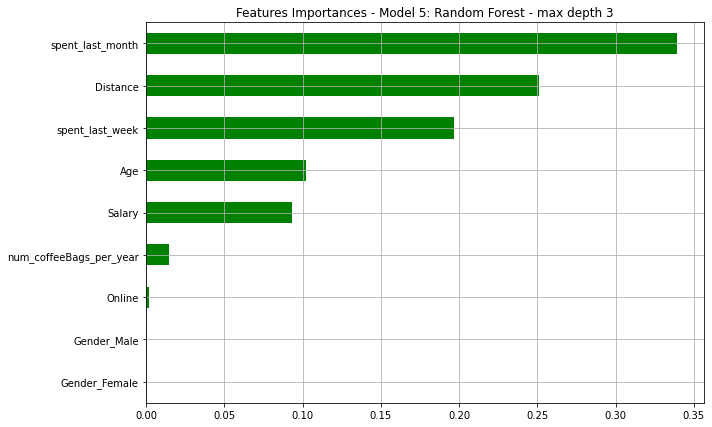

In [80]:
# Create a pd.Series of features importances
importances_RF = pd.Series(data=firstRFModel.feature_importances_, index=X_train.columns)#

# Sort importances
importances_sorted = importances_RF.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(10, 7))
importances_sorted.plot(kind='barh', color='green')
plt.title('Features Importances - Model 5: Random Forest - max depth 3')
plt.grid(True)
plt.show()

In [81]:
# Now let's call  predict() on the Random Forest Model:
potential_buyers = firstRFModel.predict(new_X)

In [82]:
# Let's get the numbers of YES's and NO's in the potential buyers 
np.unique(potential_buyers, return_counts=True)

(array(['NO', 'YES'], dtype=object), array([ 39, 189], dtype=int64))

In [83]:
total_buyer = 303 + 189 
print('The total number of potential buyers is: ', total_buyer)

The total number of potential buyers is:  492


In [84]:
# Let's calculate the proportion of buyers
total_buyer/702

print("WOOOOOOOW", round((492/702)*100, 2), "% of people want to buy the Hidden Farm coffee." )

WOOOOOOOW 70.09 % of people want to buy the Hidden Farm coffee.


## 8. Conclusion

As shown above **Random Forest Model 5** has shown an increase of the potetial buyers by 3.2% from 183 to 189 potetial buyers and that put us exactly at 70.1 % which is more than indicated 70% of the interviewed customers who are likely to buy the Hidden Farm coffee. 

### According to the above we can encourage ***RR Diner Coffee*** to strike the deal with the local Hidden Farm farmers.

## 9. Why Random Forests outerperform Gini Model2, even with much lower Accuracy?

  * Because our Dataset is imbalanced; accuracy should not be used to measure our Models Performance. 
  * Instead of Accuracy, we need to focus in Confusion Matrix that shows the correct predictions and types of incorrect predictions, as shown below the prediction power of "Yes" has increased in Random Forest compared to Gini Model.
  * In addition to confusion matrix we can use ROC AUC from **sklearn.metrics** to evaluate metrics for calculating the performance of any classification model's performance, as shown below AUC score is signficantly higher in Random Forest compared to Gini Model

#### 9a. Confusion Matrix

##### Gini impurity  model - max depth 3:
1. Actual Data it's distributed as "NO"=41 and "YES"=78
2. TP (True Positives): Model predicted "NO" and it was actually "NO" = 39
3. TN (True Negatives): Model predicted "YES" and it was actually "YES" = 77
4. FN (False Negatives): Model predicted "YES" and it was actually "No" = 2
5. Total "Yes" was 80

##### Random Forest model 5 - max depth 3:
1. Actual Data it's distributed as "NO"=41 and "YES"=78
2. TP (True Positives): Model predicted "NO" and it was actually "NO" = 35 (Less than Gini Model)
3. TN (True Negatives): Model predicted "YES" and it was actually "YES" = 77 (Similar to Gini)
4. FN (False Negatives): Model predicted "YES" and it was actually "No" = 6 (Increased by 4 compared to Gini)
5. Total "Yes" was 84

**<ins>Gini impurity  model - max depth 3:<ins>** **Confusion Matrix Breakdown**

| Metrics | value  |Metrics   | value  | Total  | value  |
|:---:|:---:|:---:|:---:|:---:|:---:|
| TP |  39 | FN  | 2  |Total   | 41  |
| FP |   1|  TN | 77  |Total   | 78  |  


    
    
    
    
    
 

**Random Forest model 5 - max depth 3: Confusion Matrix Breakdown:**

| Metrics | value  |Metrics   | value  | Total  | value  |
|:---:|:---:|:---:|:---:|:---:|:---:|
| TP |  35 | FN  | 6  |Total   | 41  |
| FP |   1|  TN | 77  |Total   | 78  | 

#### 9b. Classification Report

In [86]:
print("Gini Model 2 - no max depth: classification report")
print(classification_report(y_test, (gini_model2.predict(X_test)), digits=6))
print(' ')
print("Random Forest model 5 - max depth 3: classification report")
print(classification_report(y_test, (firstRFModel.predict(X_test)), digits=6))

Gini Model 2 - no max depth: classification report
              precision    recall  f1-score   support

          NO   0.975000  0.951220  0.962963        41
         YES   0.974684  0.987179  0.980892        78

    accuracy                       0.974790       119
   macro avg   0.974842  0.969199  0.971927       119
weighted avg   0.974793  0.974790  0.974715       119

 
Random Forest model 5 - max depth 3: classification report
              precision    recall  f1-score   support

          NO   0.972222  0.853659  0.909091        41
         YES   0.927711  0.987179  0.956522        78

    accuracy                       0.941176       119
   macro avg   0.949967  0.920419  0.932806       119
weighted avg   0.943047  0.941176  0.940180       119



#### 9c. ROC AUC

In [87]:
print("Random Forest Model AUC: {}".format(round(roc_auc_score(y_test,(firstRFModel.predict_proba(X_test)[:,1])),6)))
print(' ')
print("Gini Model2 AUC: {}".format(round(roc_auc_score(y_test,(gini_model2.predict_proba(X_test)[:,1])),6)))
print(' ')
print("Entropy Model2 AUC: {}".format(round(roc_auc_score(y_test,(entr_model2.predict_proba(X_test)[:,1])),6)))
print(' ')
print("Gini Model AUC: {}".format(round(roc_auc_score(y_test,(gini_model.predict_proba(X_test)[:,1])),6)))
print(' ')
print("Entropy Model AUC: {}".format(round(roc_auc_score(y_test,(entr_model.predict_proba(X_test)[:,1])),6)))

Random Forest Model AUC: 0.994997
 
Gini Model2 AUC: 0.987023
 
Entropy Model2 AUC: 0.976548
 
Gini Model AUC: 0.981395
 
Entropy Model AUC: 0.987805


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
%%html
<style>
table {float:left}
</style>